In [247]:
import pandas as pd
from google.colab import files
#uploaded = files.upload()
#ulonglong = pd.read_csv('diabetes.csv')
#ulonglong.describe()
from google.colab import drive
drive.mount('/content/drive')

ulonglong = pd.read_excel('/content/drive/MyDrive/math1.xlsx')
ulonglong.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#data preprations

##funtions

In [58]:
import  numpy as np
def analyze_column(df, column_name,display1):
    # Filter non-numerical values in the specified column
    non_numerical_values = df[column_name][~df[column_name].apply(lambda x: isinstance(x, (int, float))) & df[column_name].notna()]

    # Get unique non-numerical values and convert them to a NumPy array
    unique_non_numerical = np.array(non_numerical_values.unique())

    # Count numerical values, NaN values, and non-numerical values
    num_numerical = df[column_name].apply(lambda x: isinstance(x, (int, float))).sum()
    num_nan = df[column_name].isna().sum()
    if display1:
      print(f'strings = {unique_non_numerical} , num count = {num_numerical} , nuns count = {num_nan}')
    return unique_non_numerical, num_numerical, num_nan
analyze_column(raw_data,'address',True)
#print(f'strings = {strings} , numbers = {num_numbers} , nuns = {num_nun}')

strings = ['U' 'R'] , num count = 0 , nuns count = 0


(array(['U', 'R'], dtype=object), 0, 0)

In [86]:
def one_hot_encode_column(df, column_name):
    # Check if the column is non-numerical or has a small number of unique values
    if column_name in df.columns:  a
    else : return df
    unique_values = df[column_name].nunique()
    if not pd.api.types.is_numeric_dtype(df[column_name]) or unique_values < 10:
        # Apply one-hot encoding
        df = pd.get_dummies(df, columns=[column_name], prefix=column_name)
        print(f"One-hot encoding applied to column '{column_name}'")
    else:
        print(f"Column '{column_name}' does not need one-hot encoding")

    return df
#one_hot_encode_column(raw_data,'address')

In [121]:
def apply_one_hot_encoding(df, threshold=10):
   # Loop through each column and apply one-hot encoding where appropriate
  columns_to_encode = []
  for column in df.columns:

    unique_values = df[column].nunique()
    #Check if the column is non-numerical or has few unique values (e.g., < threshold)
    if not pd.api.types.is_numeric_dtype(df[column]) or unique_values <= threshold:
      # Apply one-hot encoding to selected columns
      df = pd.get_dummies(df, columns=[column], prefix=column)
  return df

#a = apply_one_hot_encoding( mpg_dataset,5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,6,10,10


##aplications for data preperations

false predictions = 158


<Figure size 640x480 with 0 Axes>

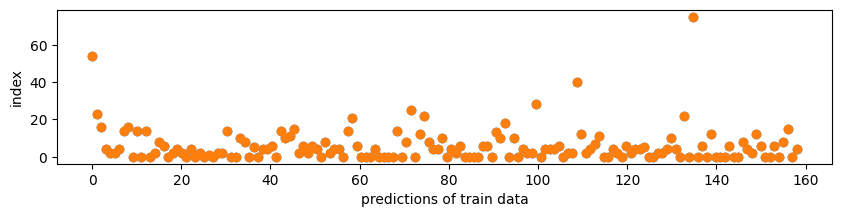

In [245]:
from sklearn import preprocessing

#df2 = raw_data.drop(['absences'],axis=1)
#df2.head()
mpg_dataset = raw_data.copy()
#data prepration
mpg_dataset = apply_one_hot_encoding(mpg_dataset,10)
#removing the results
input_data = mpg_dataset.drop(columns=['G1', 'G2', 'G3'])
Out1 = mpg_dataset['G1']
Out2 = mpg_dataset['G2']
Out3 = mpg_dataset['G3']

#scaling the output
min_max_scaler = preprocessing.MinMaxScaler()
x = Out1.values
x = x.reshape(-1, 1)
#returns a numpy array

x_scaled = min_max_scaler.fit_transform(x)
data1 = pd.DataFrame(x_scaled)
#data1=stats.zscore(Out1)
#data2=stats.zscore(Out2)
#data3=stats.zscore(Out3)
#data spilit
X_train, X_test, y_train, y_test = train_test_split(input_data, data1, test_size=0.6, random_state=42)
X_train.head(10)
disp12(1,X_train['absences'],X_train['absences'],1)
#mpg_dataset=pd.concat([mpg_dataset, ohe_origin],axis=1)

#Model definition

In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

number_of_features = len(X_train.columns)
input_shape = (number_of_features,)  # Replace with actual number of features
inputs = Input(shape=input_shape)
#input layer
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(number_of_features,)))

#hidden layers
#model.add(Dense(20, activation='tanh'))
#model.add(Dense(20, activation='sigmoid'))
#x = Dense(32, activation='sigmoid')(x)
#x = Dense(1, activation='relu')(x)

# Output layer with linear activation for regression
model.add(Dense(1, activation='relu'))
#outputs = Dense(1)(x)


#model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [243]:
model.fit(X_train, y_train, epochs=100,verbose=0)
# Evaluate on the training set
loss = model.evaluate(X_train, y_train)
print(f'Training Loss: {loss}')
Y1 = model.predict(X_train)
#Y2 = model.predict(X_test)
disp12(1,Y1,y_train,3)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

#display

In [163]:
def splitt1(split1,predictions1,real_values1):
  #get data to write size
  len = predictions1.shape[0]
  a1= int(len / split1)
  a2= int(a1 * split1)
  a3 = np.zeros(len)
  #for range---
  for i in range(a2,len):
    a3[i]=1
  #getting number from one to na other
  #a3 = np.linspace(a2,len,len-a2+1)
  #print(f'a2 = {a2} , a1 = {len} , a3 = {a3}')
  pred3 = np.delete(predictions1, a3==1)
  outcome3 = np.delete(real_values1, a3==1)
  return pred3,outcome3
  #pred2.shape
Y1 = model.predict(X_train)
#split1 = 5
#p1 ,o1 = splitt1(split1,Y1,y_train)
#print(f'{p1.shape} , {Y1.shape}')
#np.split(p1, split1)[0].shape

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [179]:
#display
import matplotlib.pyplot as plt

def disp12(split_,predictions1,real_values1,display2):
  #make it devidable by the split number
  pred2 , outcome2 = splitt1(split_,predictions1,real_values1)
  #find where predctionn is wrong and mark it
  out3 = np.zeros(pred2.shape[0])
  #out3[pred2!=outcome2] = 0.5
  #out3[pred2==outcome2] = np.NaN
  print(f'false predictions = {np.count_nonzero(~np.isnan(out3))}')
  #
  n1 = np.linspace(0,pred2.shape[0],pred2.shape[0])
  #print(f'{np.split(n1, split_)[0].shape} , split {split_}')
  #display
  for colum1 in range(1):
    #chose part of split to display
    display1 = display2
    if display1 >= split_:
      display1 = split_ -1
    #
    plt.figure(colum1)
    plt.figure(figsize=(10,2))
    #show predictions
    plt.scatter(np.split(n1, split_)[display1],np.split(pred2, split_)[display1])
    plt.xlabel(f'predictions of train data')
    plt.ylabel('index')
    #show the given value
    plt.scatter(np.split(n1, split_)[display1],np.split(outcome2, split_)[display1])


#test model

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
false predictions = 156


<Figure size 640x480 with 0 Axes>

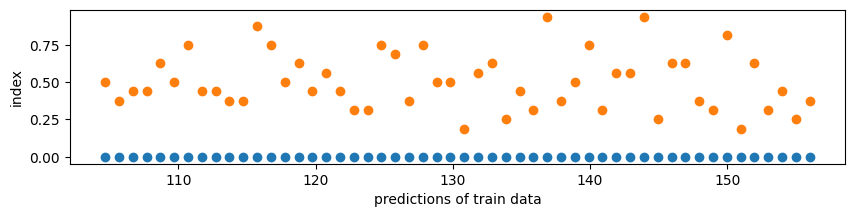

In [229]:
Y1 = model.predict(X_train)
#Y2 = model.predict(X_test)
disp12(3,Y1,y_train,3)
#disp12(3,Y2,y_test,1)